In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df_credit = pd.read_csv("OneDrive/Desktop/Data/German_Credit_Card.csv")
print(df_credit.shape)
df_credit.head()

(1000, 11)


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [38]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [45]:
print("Sex : ",df_credit.Sex.unique())
print("Housing : ",df_credit.Housing.unique())
print("Saving accounts : ",df_credit['Saving accounts'].unique())
print("Risk : ",df_credit['Risk'].unique())
print("Purpose : ",df_credit.Purpose.unique())
print("Checking account : ",df_credit['Checking account'].unique())

Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Checking account :  ['little' 'moderate' nan 'rich']


In [48]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

In [49]:
print("Checking account : ",df_credit['Checking account'].unique())

Checking account :  ['little' 'moderate' 'no_inf' 'rich']


In [50]:
df_credit.head(20)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,no_inf,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,no_inf,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,no_inf,no_inf,9055,36,education,good
6,6,53,male,2,own,quite rich,no_inf,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,no_inf,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


In [51]:
#Purpose to Dummies Variable
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)

In [52]:
df_credit.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,...,Housing_rent,Savings_moderate,Savings_no_inf,Savings_quite rich,Savings_rich,Risk_bad,Risk_good,Check_moderate,Check_no_inf,Check_rich
0,0,67,male,2,own,no_inf,little,1169,6,radio/TV,...,0,0,1,0,0,0,1,0,0,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,...,0,0,0,0,0,1,0,1,0,0
2,2,49,male,1,own,little,no_inf,2096,12,education,...,0,0,0,0,0,0,1,0,1,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,...,0,0,0,0,0,0,1,0,0,0
4,4,53,male,2,free,little,little,4870,24,car,...,0,0,0,0,0,1,0,0,0,0
5,5,35,male,1,free,no_inf,no_inf,9055,36,education,...,0,0,1,0,0,0,1,0,1,0
6,6,53,male,2,own,quite rich,no_inf,2835,24,furniture/equipment,...,0,0,0,1,0,0,1,0,1,0
7,7,35,male,3,rent,little,moderate,6948,36,car,...,1,0,0,0,0,0,1,1,0,0
8,8,61,male,1,own,rich,no_inf,3059,12,radio/TV,...,0,0,0,0,1,0,1,0,1,0
9,9,28,male,3,own,little,moderate,5234,30,car,...,0,0,0,0,0,1,0,1,0,0


In [53]:
#Excluding the missing columns
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Risk"]
del df_credit['Risk_good']

In [54]:
df_credit.shape

(1000, 23)

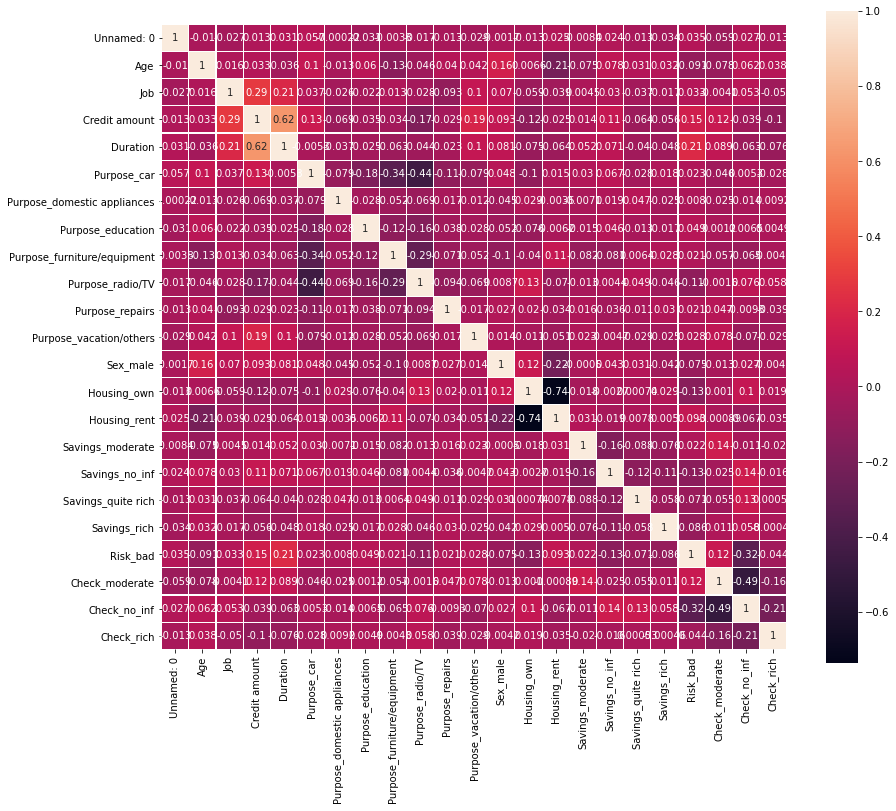

In [61]:
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()


In [62]:
del df_credit["Unnamed: 0"]

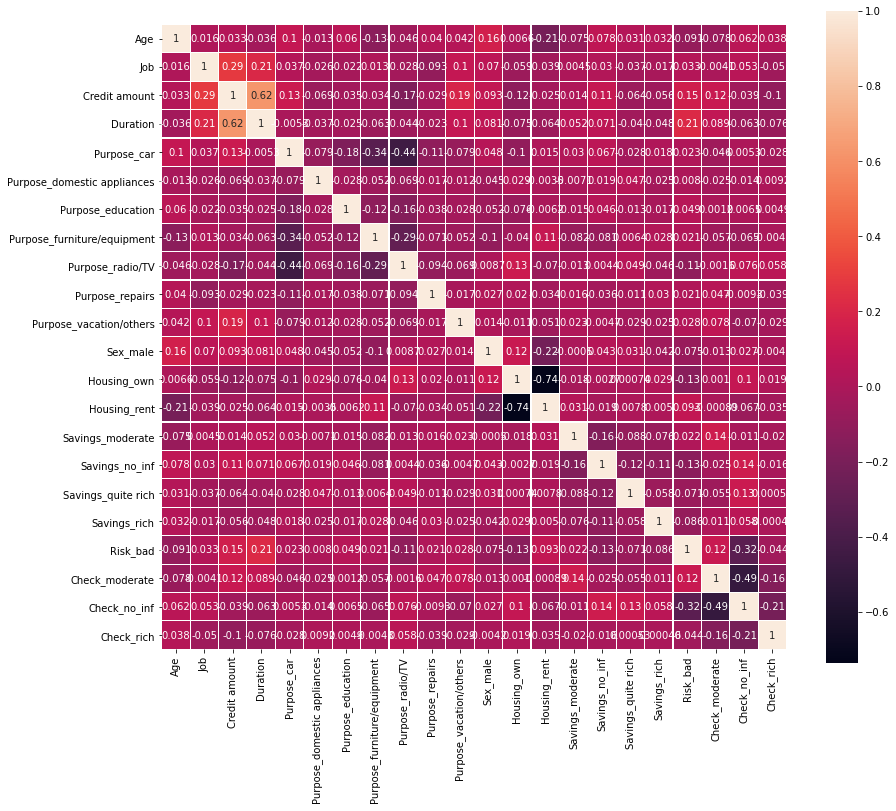

In [63]:
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()


In [67]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [68]:
#Creating the X and y variables
X = df_credit.drop('Risk_bad', 1).values
y = df_credit["Risk_bad"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

C:\Users\sonik\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\sonik\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\sonik\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

LR: 0.366734 (0.057541)
KNN: 0.240678 (0.079620)
CART: 0.557428 (0.100141)

C:\Users\sonik\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.




RF: 0.378228 (0.079766)


C:\Users\sonik\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



XGB: 0.417711 (0.102693)


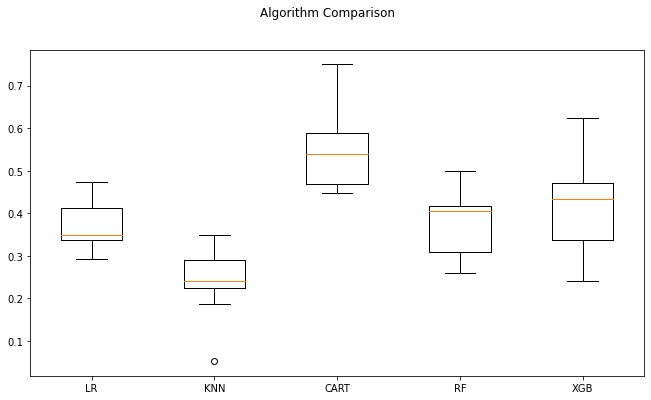

In [69]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [70]:
## we can see that Decision Tree, Random forst and XGboost are giving good values of recall, let us use these three alorithms and find best reults using gridsearchcv

In [71]:
#1. Deision tree classifier

In [75]:
#Seting the Hyper Parameters
param_grid = {'max_leaf_nodes': list(range(2, 100)),'min_samples_split': [2, 3, 4]}

#Creating the classifier
model1 = DecisionTreeClassifier(random_state=2)

grid_search = GridSearchCV(model1, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.000, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.000, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.000, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.000, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.000, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.000, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  max_leaf_nodes=4, min_samples_split=4, score=0.478, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=2, score=0.333, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=2, score=0.444, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=2, score=0.326, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=2, score=0.283, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=2, score=0.478, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=5, min_samples_split=3, score=0.333, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=3 ...........................

[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:   10.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             scoring='recall', verbose=4)

In [76]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.4867632850241546
{'max_leaf_nodes': 94, 'min_samples_split': 2}


In [80]:
DT = DecisionTreeClassifier( min_samples_split=2,max_leaf_nodes= 94)

In [81]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=94)

In [83]:
#Testing the model 
#Predicting using our  model
y_pred = DT.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.7


[[146  32]
 [ 43  29]]


0.4154727793696275


In [84]:
#2. Random forest clasifier

In [85]:
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.067, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.156, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.174, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.130, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.130, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.067, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimat

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  1.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [4, 7, 15, 20],
                         'n_estimators': [3, 5, 10, 25, 50, 150]},
             scoring='recall', verbose=4)

In [86]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.5128502415458938
{'max_depth': None, 'max_features': 20, 'n_estimators': 5}


In [87]:
rf = RandomForestClassifier(max_depth=None, max_features=20, n_estimators=5, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=20, n_estimators=5, random_state=2)

In [88]:
#Predicting using our  model
y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.728


[[150  28]
 [ 40  32]]


0.4597701149425288


In [89]:
#3. XGBosst

In [90]:
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Creating the classifier
model_xg = XGBClassifier(random_state=2)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=2),
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 5, 6, 10],
                         'min_child_weight': [3, 5, 10],
                         'subsample': [0.75, 0.8, 0.85]},
             scoring='recall')

In [91]:
grid_search.best_score_
grid_search.best_params_

{'colsample_bytree': 0.85,
 'gamma': 0.3,
 'max_depth': 10,
 'min_child_weight': 3,
 'subsample': 0.75}

In [92]:
y_pred = grid_search.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

0.756


[[159  19]
 [ 42  30]]
